# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques
---


In [1]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color 
from PIL import Image, ImageFilter, ImageColor, ImageOps
from numpy import asarray
import cv2

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

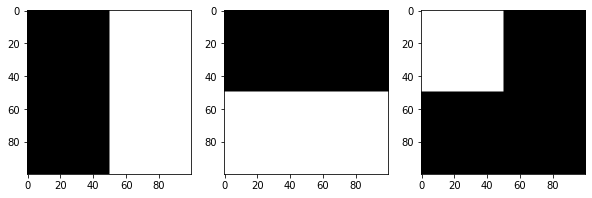

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


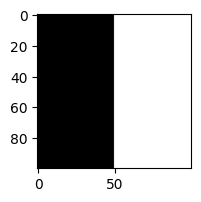

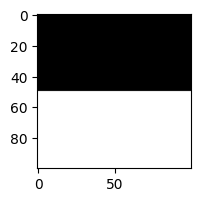

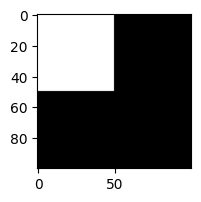

In [3]:
# solution
white_pixel = (255,255,255)
black_pixel = (0,0,0)

left = np.full((100, 50, 3), black_pixel)
right = np.full((100, 50, 3), white_pixel)
imgA = np.hstack((left, right))

top = np.full((50, 100, 3), black_pixel)
bottom = np.full((50, 100, 3), white_pixel)
imgB = np.vstack((top, bottom))

whiteCorner = np.full((50, 50, 3), white_pixel)
blackCorner = np.full((50, 50, 3), black_pixel)
imgC = np.hstack((np.vstack((whiteCorner, blackCorner)),left))

plt.figure(figsize=(2,2))
plt.interactive(b=True)
plt.imshow(imgA)
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(imgB)
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(imgC)
plt.show()


*   Use the above three images to create the following image

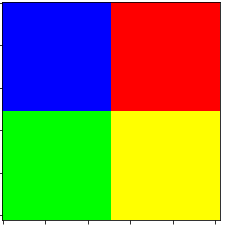
*Hint: Remember channels and color spaces*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


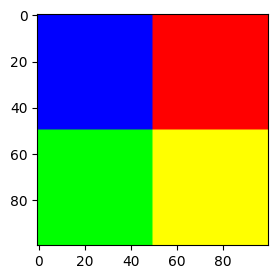

In [4]:
# solution
blue = np.flip((imgA * imgB) * (0, 0, 1),(1,0)) # (R, G, B) * (0, 0, 1)
red = np.flip((imgB - imgA) * (1, 0, 0),(0,1))
green = np.flip((imgA - imgB) * (0, 1, 0),(0,1))
yellow = np.flip(((imgA & imgB)) * (0, 1, 1), (-1))
imgD = blue + red + green + yellow

plt.figure(figsize=(3,3))
plt.imshow(imgD)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

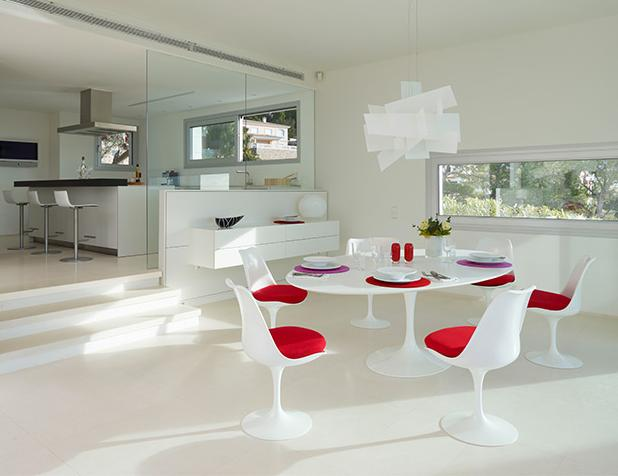

*   Extract individual channels and plot them using matplotlib subplot.



(476, 618, 3)


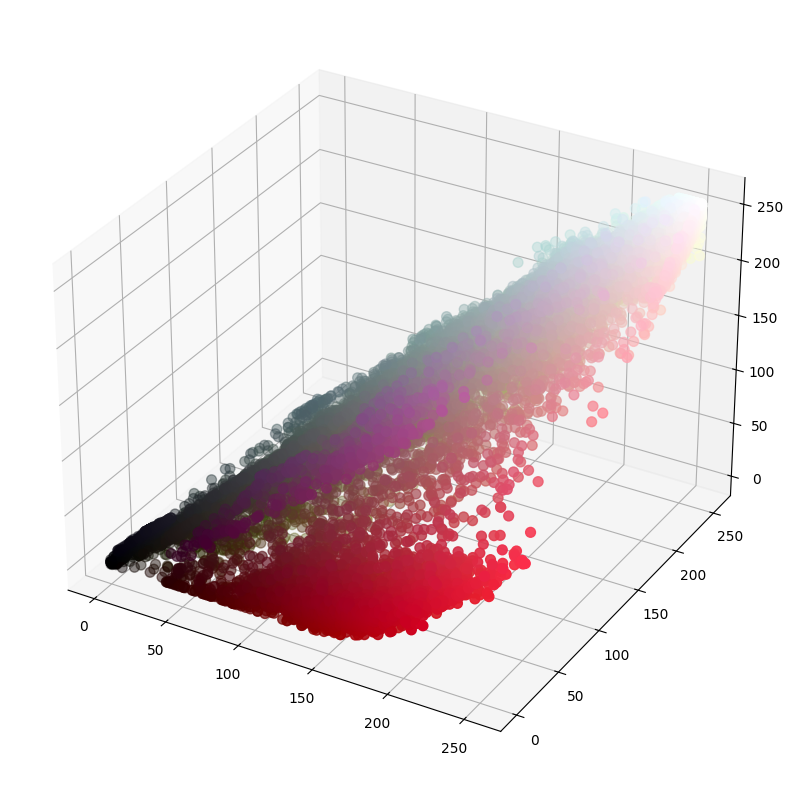

In [5]:
# solution

sillas = Image.open('images/sillas.jpg')
data = asarray(sillas)
print(data.shape)
rchan = data[:,:,0]
bchan = data[:,:,1]
gchan = data[:,:,2]

fig = plt.figure(figsize=(10,10))
pixel_array = data.reshape(data.shape[0]*data.shape[1], 3) 
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(rchan, bchan, gchan, s=50, facecolor=pixel_array/255);

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

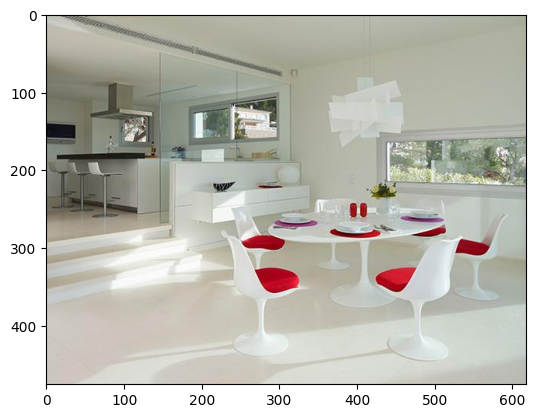

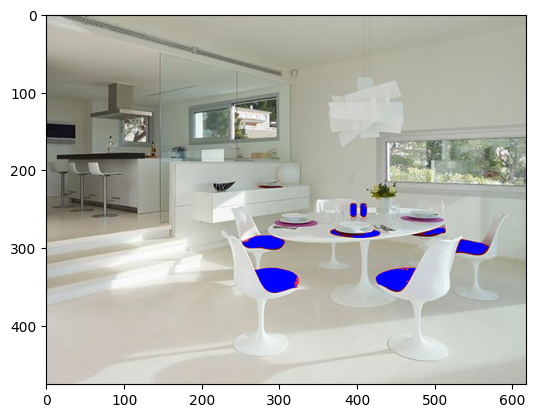

In [6]:
# solution
plt.imshow(data)
plt.show()

blue = np.array(sillas)
red_threshold = 120
red_pixels = (blue[:, :, 0] > red_threshold) & (blue[:, :, 1] < red_threshold/2) & (blue[:, :, 2] < red_threshold/2)
blue[red_pixels] = [0, 0, 255]

plt.imshow(blue)
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

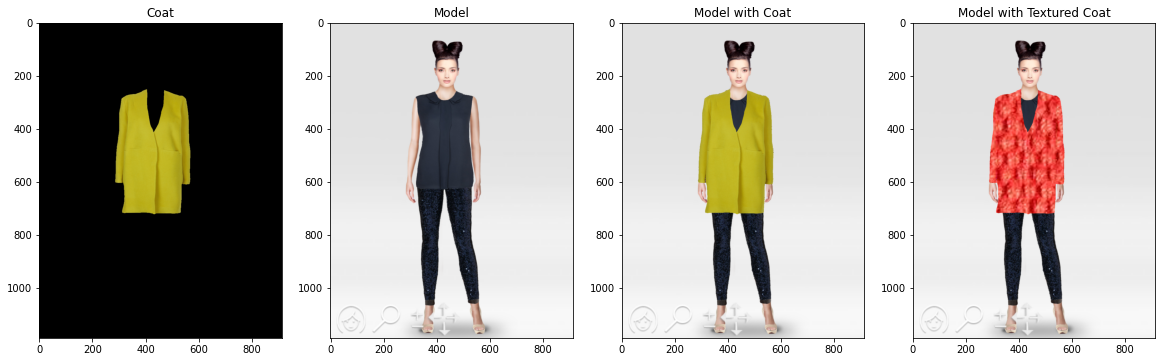

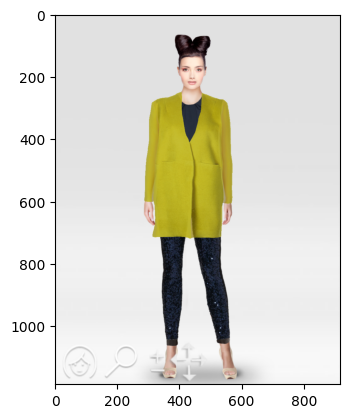

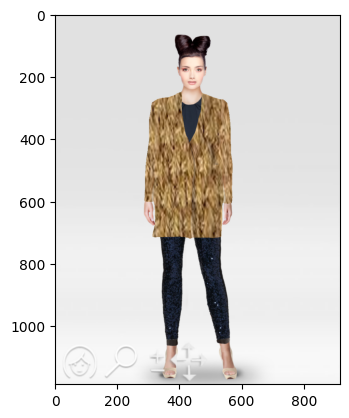

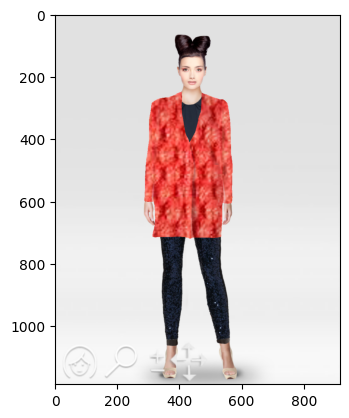

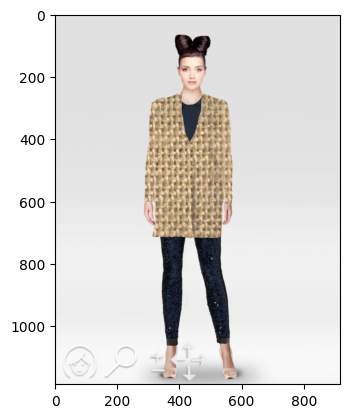

In [7]:
# solution

# Load the images
model = Image.open('images/model.png')
coat = Image.open('images/coat.png')
mask = Image.open('images/coat.png').convert('L')
mask = ImageOps.autocontrast(mask, cutoff=(.1, .9))

combined = Image.composite(coat, model, mask)
plt.imshow(combined)
plt.show()

textures = ['texture.png', 'texture2.png', 'texture3.jpg']
for texture in textures:
    mat = Image.open(f'images/{texture}').convert('RGBA').resize(model.size)
    textured = Image.composite(mat, model, mask)
    plt.imshow(textured)
    plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [8]:
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.exposure import histogram

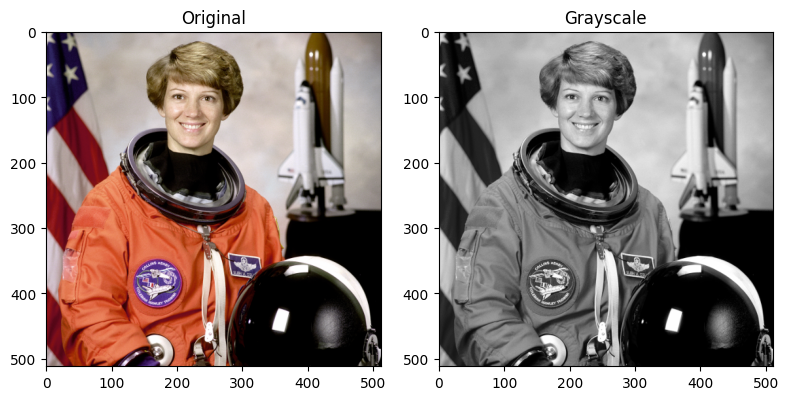

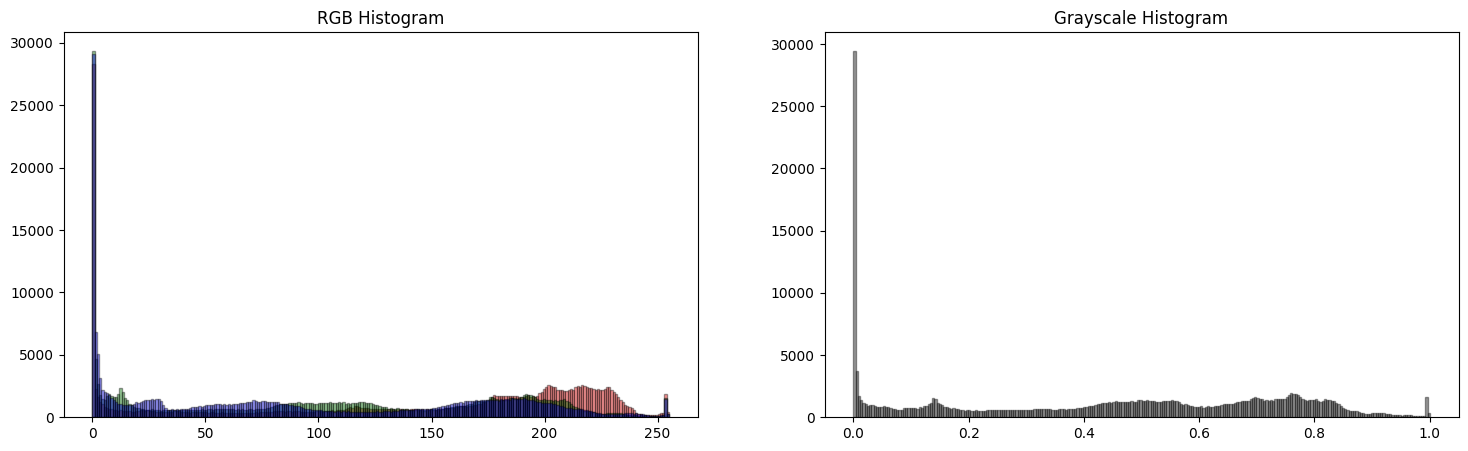

In [9]:
# solution
image = astronaut()
grayscale = rgb2gray(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

#

r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(r.ravel(), bins=256, color='red', alpha=0.4, histtype='bar', ec='black', label='Red Channel')
axes[0].hist(g.ravel(), bins=256, color='green', alpha=0.4, histtype='bar', ec='black', label='Green Channel')
axes[0].hist(b.ravel(), bins=256, color='blue', alpha=0.4, histtype='bar', ec='black', label='Blue Channel')
axes[0].set_title('RGB Histogram')

axes[1].hist(grayscale.ravel(), bins=256, color='black', alpha=0.4, histtype='bar', ec='black')
axes[1].set_title('Grayscale Histogram')
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

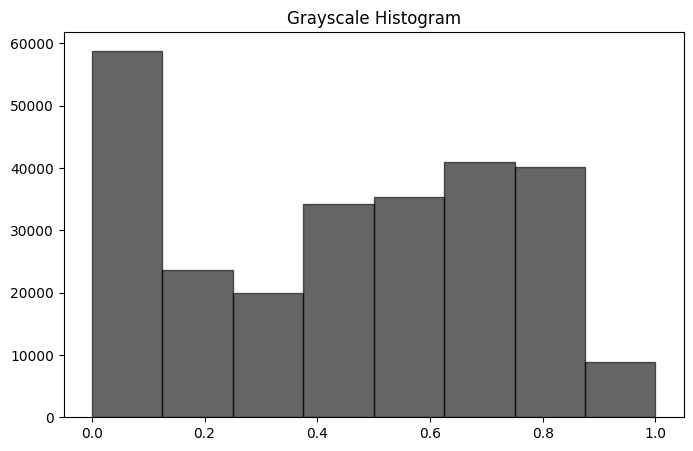

In [10]:
# solution

plt.figure(figsize=(8, 5))
plt.hist(grayscale.ravel(), bins=8, color='black', alpha=0.6, histtype='bar', ec='black')
plt.title('Grayscale Histogram')
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


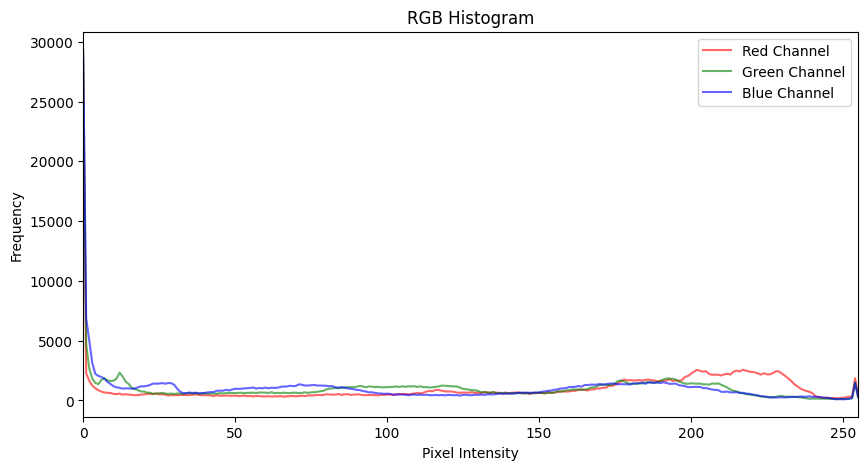

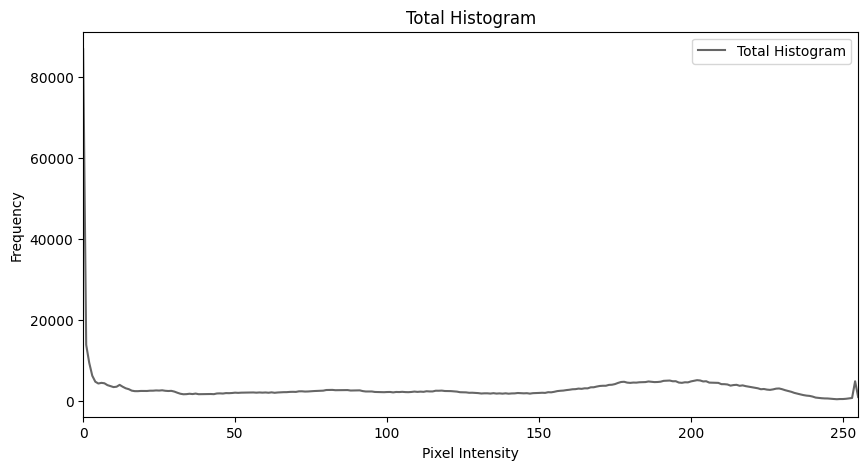

In [11]:
#solution

hist_r, bins_r = np.histogram(r, bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(g, bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(b, bins=256, range=(0, 256))
hist_total, bins_total = np.histogram(image.ravel(), bins=256, range=(0, 256))

plt.figure(figsize=(10, 5))

plt.plot(bins_r[:-1], hist_r, color='red', alpha=0.6, label='Red Channel')
plt.plot(bins_g[:-1], hist_g, color='green', alpha=0.6, label='Green Channel')
plt.plot(bins_b[:-1], hist_b, color='blue', alpha=0.6, label='Blue Channel')

plt.xlim(0, 255)
plt.title('RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

plt.figure(figsize=(10, 5))

plt.plot(bins_total[:-1], hist_total, color='black', alpha=0.6, label='Total Histogram')

plt.xlim(0, 255)
plt.title('Total Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



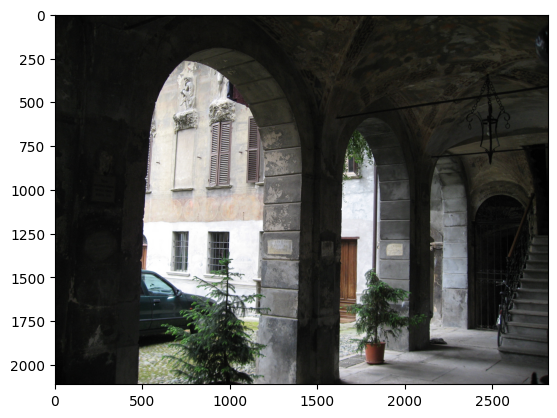

In [12]:
# solution
aquatermi = Image.open('images/aquatermi_lowcontrast.jpg')

plt.imshow(aquatermi)
plt.show()


/opt/homebrew/lib/python3.12/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


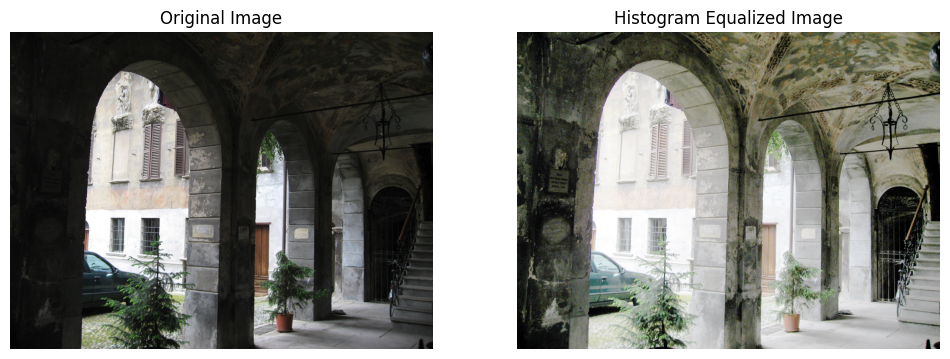

In [18]:
from skimage import exposure, img_as_float

image = img_as_float(aquatermi)
equalized_image = exposure.equalize_hist(image)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title('Histogram Equalized Image')
ax[1].axis('off')

plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



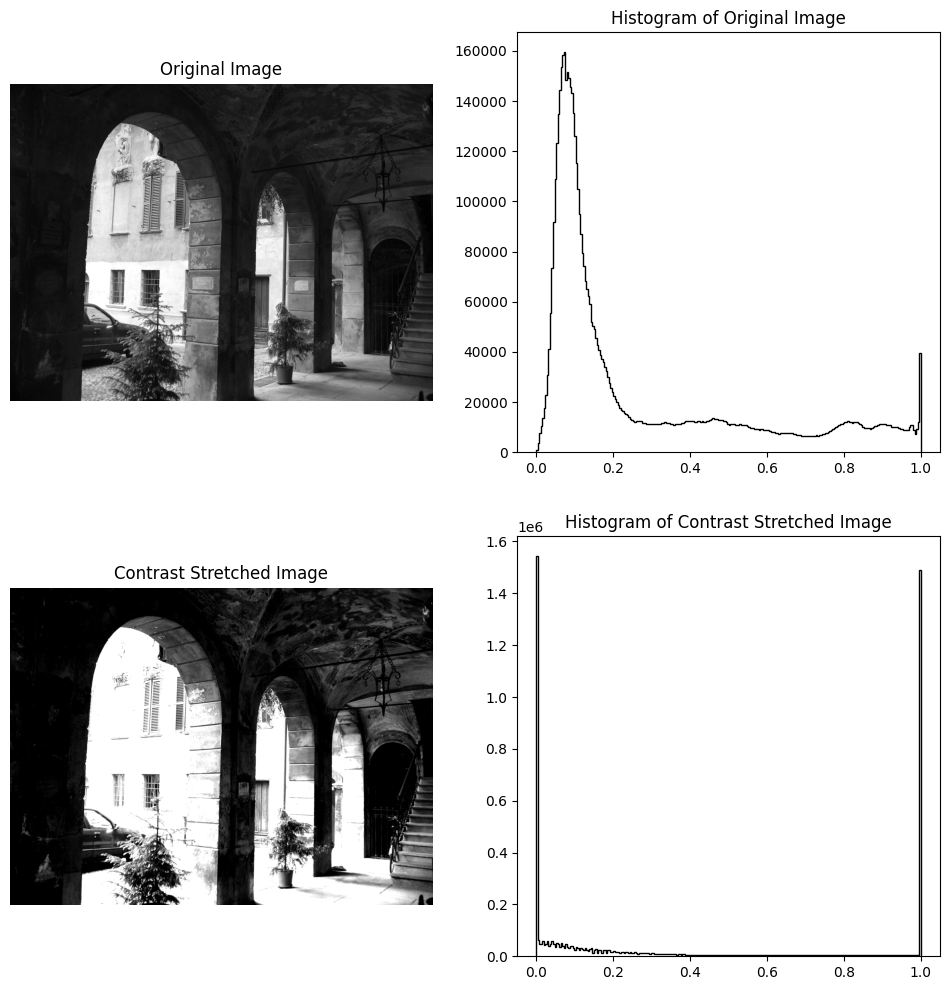

In [25]:
# solution
from skimage.io import imread

def linear_contrast_stretch(image, low_percentile=2, high_percentile=98):
    """
    Perform linear contrast stretching on an image.

    Parameters:
    - image: Input image (2D NumPy array).
    - low_percentile: Lower percentile for contrast stretching (default is 2).
    - high_percentile: Upper percentile for contrast stretching (default is 98).

    Returns:
    - Stretched image (2D NumPy array).
    """
    # Compute the lower and upper percentile values
    p_low = np.percentile(image, low_percentile)
    p_high = np.percentile(image, high_percentile)

    # Perform the linear contrast stretch
    stretched_image = (image - p_low) / (p_high - p_low)
    stretched_image = np.clip(stretched_image, 0, 1)  # Clip values to be in [0, 1]

    return stretched_image

image = imread('images/aquatermi_lowcontrast.jpg', as_gray=True)
stretched_image = linear_contrast_stretch(image, 25, 75)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].hist(image.ravel(), bins=256, histtype='step', color='black')
ax[0, 1].set_title('Histogram of Original Image')

ax[1, 0].imshow(stretched_image, cmap='gray')
ax[1, 0].set_title('Contrast Stretched Image')
ax[1, 0].axis('off')

ax[1, 1].hist(stretched_image.ravel(), bins=256, histtype='step', color='black')
ax[1, 1].set_title('Histogram of Contrast Stretched Image')
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




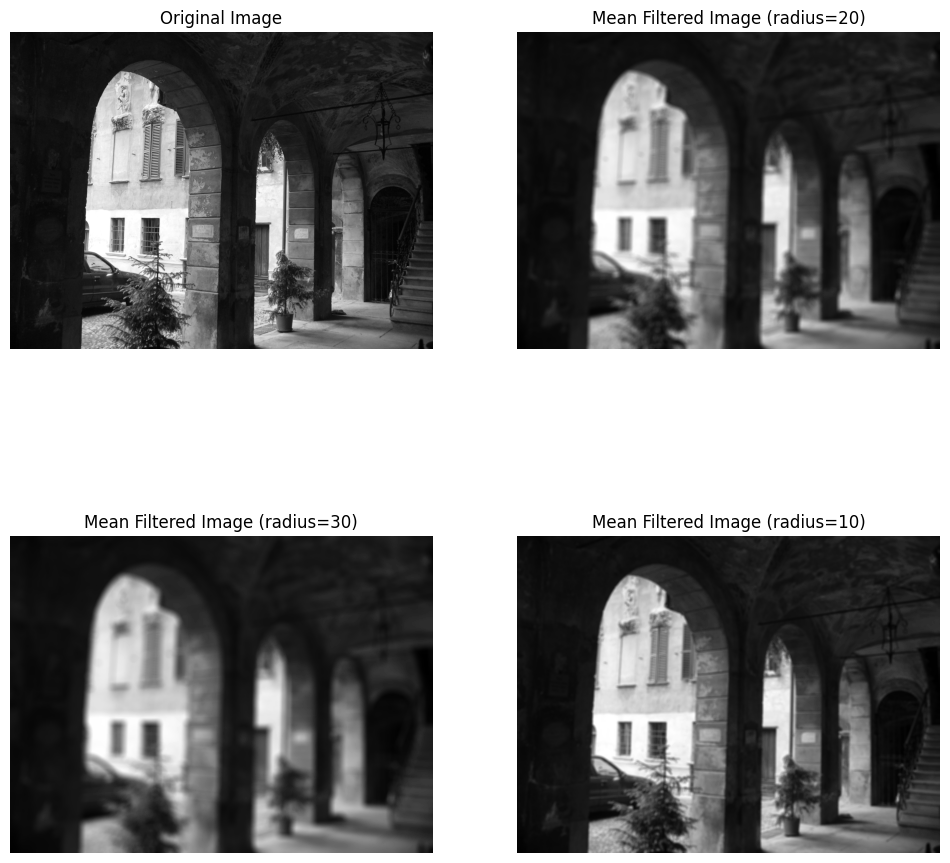

In [29]:
# solution
from skimage import img_as_ubyte
from skimage.filters.rank import mean
from skimage.morphology import disk

image = img_as_ubyte(image)

selem_20 = disk(20)
selem_30 = disk(30)
selem_10 = disk(10)

filtered_image_20 = mean(image, selem_20)
filtered_image_30 = mean(image, selem_30)
filtered_image_10 = mean(image, selem_10)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(filtered_image_20, cmap='gray')
ax[0, 1].set_title('Mean Filtered Image (radius=20)')
ax[0, 1].axis('off')

ax[1, 0].imshow(filtered_image_30, cmap='gray')
ax[1, 0].set_title('Mean Filtered Image (radius=30)')
ax[1, 0].axis('off')

ax[1, 1].imshow(filtered_image_10, cmap='gray')
ax[1, 1].set_title('Mean Filtered Image (radius=10)')
ax[1, 1].axis('off')

plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

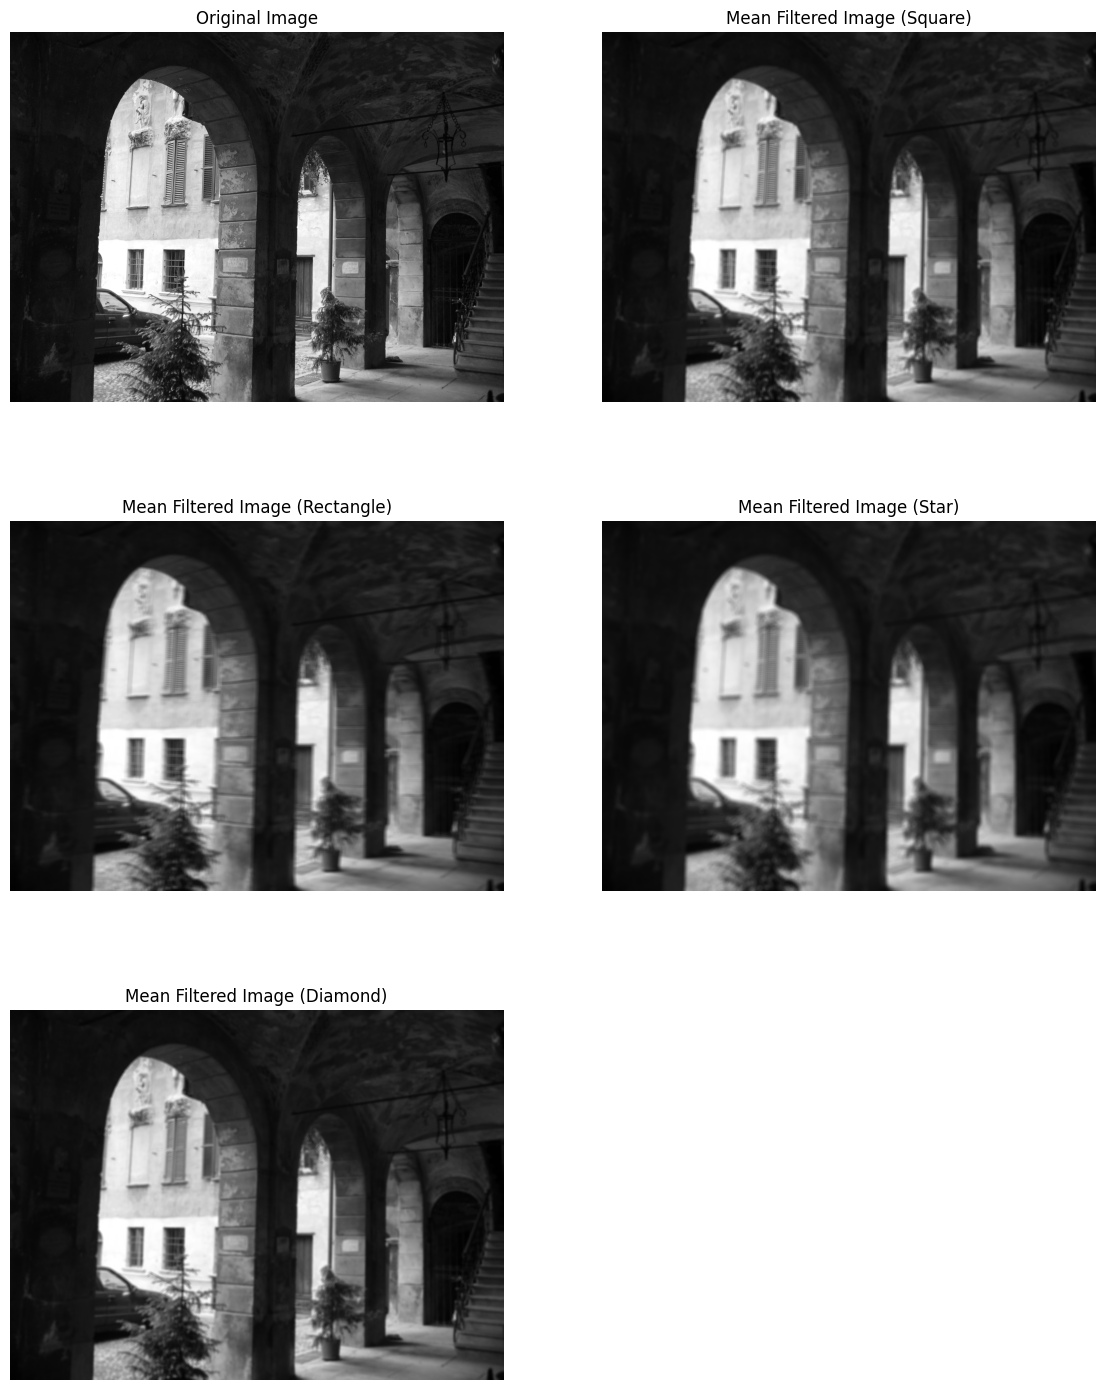

In [32]:
# solution
from skimage.morphology import square, rectangle, star, diamond
selem_square = square(17) 
selem_rectangle = rectangle(17, 29) 
selem_star = star(13)  
selem_diamond = diamond(11) 

# Apply the mean filter using the created structuring elements
filtered_image_square = mean(image, selem_square)
filtered_image_rectangle = mean(image, selem_rectangle)
filtered_image_star = mean(image, selem_star)
filtered_image_diamond = mean(image, selem_diamond)

# Display the original and filtered images
fig, ax = plt.subplots(3, 2, figsize=(14, 18))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(filtered_image_square, cmap='gray')
ax[0, 1].set_title('Mean Filtered Image (Square)')
ax[0, 1].axis('off')

ax[1, 0].imshow(filtered_image_rectangle, cmap='gray')
ax[1, 0].set_title('Mean Filtered Image (Rectangle)')
ax[1, 0].axis('off')

ax[1, 1].imshow(filtered_image_star, cmap='gray')
ax[1, 1].set_title('Mean Filtered Image (Star)')
ax[1, 1].axis('off')

ax[2, 0].imshow(filtered_image_diamond, cmap='gray')
ax[2, 0].set_title('Mean Filtered Image (Diamond)')
ax[2, 0].axis('off')

# Hide the empty subplot
fig.delaxes(ax[2, 1])

plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Small radius:
- less smoothing (a smaller neighborhood around each pixel is considered for calculating the mean)  
- more detail is preserved (details and edges in the image are better preserved because the filter is less aggressive)  
- less noise is reduced, but not as effectively as with larger radii  

Large Radius:
- more Smoothing: a larger radius means a larger neighborhood around each pixel is considered for calculating the mean. This results in more smoothing since more pixels contribute to the average value of each pixel.
- more detail loss: fine details and edges in the image may be blurred or lost because the filter is more aggressive.
- noise Reduction: noise is reduced more effectively, leading to a smoother appearance of the image.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Disks (Circular): Provide uniform and isotropic smoothing, suitable for general noise reduction and smoothing without directional bias.

Squares and Rectangles: Provide directional smoothing, effective for preserving edges along their dimensions but may introduce artifacts if not aligned with image features.

Stars and Diamonds: Provide non-uniform and directional smoothing, offering selective edge preservation and noise reduction based on their orientations.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean filters are simpler and provide uniform smoothing but may blur edges.
Mean filters are used for basic noise reduction and when edge preservation is not critical.

Gaussian filters are more sophisticated, offering selective smoothing that preserves edges better than mean filters.
Gaussian filters are used when preserving edges and fine details while reducing noise is important, such as in natural image processing and multi-scale analysis.